XGBOOST MODELS FOR 77,953:77,953 RATIO
> 
**Undersampling the incative class with Random Undersampling and Oversampling the active class with SMOTE**

IMPORTING LIBRARIES AND DATA

In [1]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
import xgboost

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, balanced_accuracy_score

In [2]:
# read dataset into dataframe
df = pd.read_csv("../../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [3]:
# checking dimension of dataset
df.shape

(195244, 778)

0    194888
1       356
Name: Activity, dtype: int64


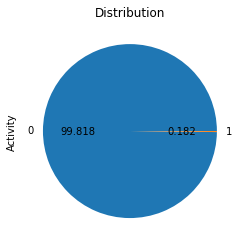

In [4]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

# visualizing the distribution of the active and inactive class
ax = y.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution");

DIVIDING INTO TRAIN AND TEST DATASET

The training and test data have the following dimensions:
(156195, 777)(39049, 777)
The class distribution of the train data:
0    155906
1       289
Name: Activity, dtype: int64


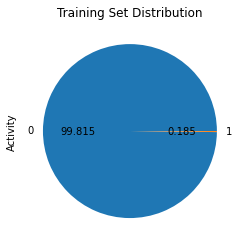

In [5]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

# visualizing class distribution of train dataset
ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Training Set Distribution");

HANDLING DATA FOR PREDICTION
>
In this section, the number of columns in the data for prediction is reduced to be equal to the number of columns of data that was used in the training

In [6]:
# reading the prediction dataset

df_pred = pd.read_csv("../../../data/new.csv")
df_pred.head(5)

,ReadIn_ID,USER_ID,USER_ID_2,D001,D002,D003,D004,D005,D006,D007,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,2011,M652-0486,"N~1~-(2,3-dihydro-1,4-benzodioxin-6-yl)-2-[9-m...",1,0,0,1,4,0,0,...,0,0,0,0,0,0,5.42626,-0.648642,0.181818,0.498807
1,2141,L258-0120,1-(5-chloro-2-methylphenyl)-3-{2-[1-(4-methylb...,2,0,0,0,3,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
2,2010,L834-0670,"4-ethyl-6-{5-[(4-fluorophenoxy)methyl]-1,2,4-o...",2,0,0,1,3,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,2.897260
3,2140,L258-0113,1-(2-chloro-4-methylphenyl)-3-{2-[1-(4-methylb...,2,0,0,0,3,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
4,2009,L834-0614,"6-{5-[(4-chlorophenoxy)methyl]-1,2,4-oxadiazol...",2,0,0,1,3,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,3.010430


In [7]:
# Removing columns not needed for training 
df_pred.drop(['ReadIn_ID', 'USER_ID_2'], axis = 1, inplace = True)

In [8]:
# Making the ID the index
df_pred = df_pred.set_index('USER_ID')
df_pred.head(5)

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
USER_ID,,,,,,,,,,,,,,,,,,,,,
M652-0486,1,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.42626,-0.648642,0.181818,0.498807
L258-0120,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0670,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,2.897260
L258-0113,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0614,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,3.010430


In [9]:
# checking dimension of dataset
X_train.shape, df_pred.shape

((156195, 777), (36711, 777))

REMOVING LOW VARIANCE FEATURES
> 
The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance

In [10]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

# Subset the dataset for predictions
df_p = df_pred.loc[:, mask]

In [11]:
X_train.shape, X_test.shape, df_p.shape, df_pred.shape

((156195, 359), (39049, 359), (36711, 359), (36711, 777))

The number of rows in the dataset remain the same however the number of columns have reduced

XGBOOST MODEL TRAINING
> 
For this section, the model is trained on either unsampled data or resampled data.

RESAMPLING USING RUS AND SMOTE
> 
The dataset is resampled using either one or a combination of random undersampler and smote with different ratios. Meaning, you can use undersampling and skip oversampling or vice versa or use both
>
**THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

OVERSAMPLING

In [12]:
# over = SMOTE(sampling_strategy=0.5, random_state = 42)
# X_train, y_train = over.fit_resample(X_train, y_train)

# checking class distribution on resampled dataset
print(y_train.value_counts())

0    155906
1       289
Name: Activity, dtype: int64


UNDERSAMPLING

In [13]:
rus = RandomUnderSampler(sampling_strategy=0.003707362128462, random_state = 42)
X_train, y_train = rus.fit_resample(X_train, y_train)

# checking class distribution of further resampled dataset
print(y_train.value_counts())

0    77953
1      289
Name: Activity, dtype: int64


**Visualizing distribution of final resampled dataset**


0    77953
1      289
Name: Activity, dtype: int64


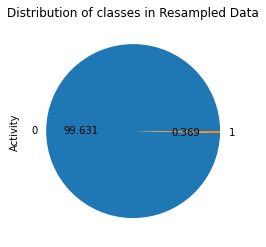

In [14]:
# checking class distribution of further resampled dataset
print(y_train.value_counts())

ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution of classes in Resampled Data");

In [16]:
# checking ratio inactives to active to use as scale_pos_weight

77953/289

269.7335640138408

TRAINING MODELS

In [17]:
# creating model object
clf = xgboost.XGBClassifier(use_label_encoder=False, scale_pos_weight = 269)

# training model
clf.fit(X_train, y_train)

[06:39:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=269, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

PREDICTIONS

In [18]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

CHECKING METRICS
> 
The metrics will be checked for both the training data and the tes dataset
> 
For the confusion matrix: <br>
> 
True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

TRAINING DATA

Accuracy Score:  1.0
Balanced Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
MCC:  1.0
AUROC:  1.0
Average:  1.0


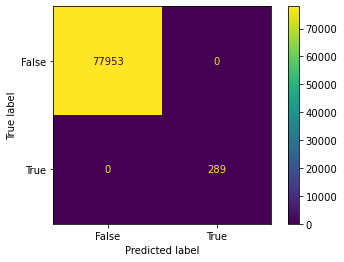

In [19]:
accuracy_train = accuracy_score(y_train, train_predictions)
balanced_accuracy_train = balanced_accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)
mcc_train = matthews_corrcoef(y_train, train_predictions)

pred_prob = clf.predict_proba(X_train)[:,1]
auroc_train = roc_auc_score(y_train, pred_prob)

avg_train = np.mean([balanced_accuracy_train, precision_train, recall_train, f1_train, mcc_train])

print("Accuracy Score: ", accuracy_train)
print("Balanced Accuracy: ", balanced_accuracy_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)
print("F1 Score: ", f1_train)
print("MCC: ", mcc_train)
print("AUROC: ", auroc_train)

print("Average: ", avg_train)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

TEST DATA

Accuracy Score:  0.9996670849445568
Balanced Accuracy:  0.9104349347613173
Precision Score:  0.9821428571428571
Recall Score:  0.8208955223880597
F1 Score:  0.8943089430894309
MCC:  0.8977521140653482
AUROC:  0.9935527074493624
Average:  0.9011068742894025


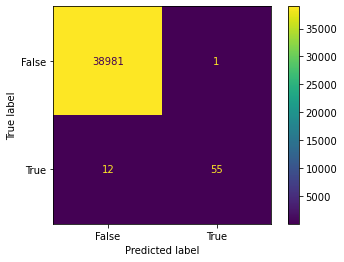

In [20]:
accuracy_test = accuracy_score(y_test, test_predictions)
balanced_accuracy_test = balanced_accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)
mcc_test = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, pred_prob[:,1])

#taking the mean of balanced accuracy, precision, recall, f1 and mcc
avg_test = np.mean([balanced_accuracy_test, precision_test, recall_test, f1_test, mcc_test])

print("Accuracy Score: ", accuracy_test)
print("Balanced Accuracy: ", balanced_accuracy_test)
print("Precision Score: ", precision_test)
print("Recall Score: ", recall_test)
print("F1 Score: ", f1_test)
print("MCC: ", mcc_test)
print("AUROC: ", auroc_test)

print("Average: ", avg_test)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

PLOTTING THE AUROC CURVE
> 
This is done for only the test data

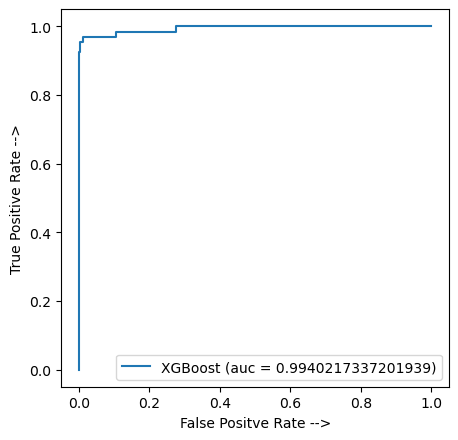

In [20]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

Is the curve consistent to the auroc value obtained previously

Performing predictions on new datasets to find new actives